In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from category_encoders.cat_boost import CatBoostEncoder
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/client_attrition_train.csv')

In [3]:
df

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.0,F,2,High School,Married,40-60K,31,1593.0,Blue,...,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,open
1,568093,46.0,F,2,Graduate,Unknown,below 40K,40,6568.0,Blue,...,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000,closed
2,595389,43.0,M,1,High School,Married,80-120K,30,34516.0,Silver,...,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,open
3,287252,46.0,F,4,High School,Married,below 40K,36,2374.0,Blue,...,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,open
4,231901,40.0,M,4,High School,Single,80-120K,29,12978.0,Blue,...,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,435491,NaN,F,2,High School,Single,40-60K,36,1677.0,Blue,...,3,1,0,1677.0,0.700,4035.0,87,0.891,0.000,open
10123,136052,46.0,F,4,Uneducated,Single,Unknown,33,224541.0,Blue,...,3,3,1749,23200.0,0.626,4092.0,77,0.540,0.070,open
10124,336583,44.0,M,0,High School,Single,60-80K,36,6606.0,Blue,...,3,2,2517,4089.0,0.825,4493.0,68,0.659,0.381,open
10125,817129,39.0,F,5,Graduate,Single,below 40K,28,2077.0,Blue,...,3,2,0,2077.0,0.590,3647.0,69,0.917,0.000,open


In [4]:
profile = ProfileReport(df, title="Profiling Report")

In [5]:
# profile.to_file("clasification_profile_report.html")

EDA Conclusions/Tasks:
Columns:
- Customer ID - to be dropped
- Customer Age - needs to be imputed (maybe check relationship length for hints)
- Customer Sex - encode
- Customer Education - encode
- Customer Civil Status - encode
- Customer Salary Range - encode, impute
- Customer Relationship Length - a lot of 36 year long relationships - to be further inspected
- Customer Available Credit Limit - use log
- Credit Card Classification - encode
- Total Products - use log? create bins for 0-5, 5-10, 10 or more products
- Period Inactive - create bins for 0-3 and 3 or more
- Contacts in last year - no additional ideas atm
- Credit Card Debt Balance - create bin for cc bal = 0, standardize
- Remaining Credit Card Limit - use log
- Transaction Amount Ratio - additional bins for 0-0.5, 0.5-1, 1-2, 2 or more?
- Total Transaction Amount - create bin for transaction amt = 0, use log
- Total Transaction Count - create bins for 0-25, 25-50, 50-100, 100 or more
- Transaction Count Ratio - additional bins for 0-0.5, 0.5-1, 1-2, 2 or more?
- Average Utilization - additional bins for 0-0.2, 0.2-0.6, 0.6 or more.
- Account status - encode


Imputting:
- check relation between customer age and customer relationship length
- check relation between salary range and sex (and maybe cc limit)

## Encoding

In [4]:
cb_encoder = CatBoostEncoder()
cols_to_be_encoded = ['customer_age', 'customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']
target = df.account_status.map({'open': 0, 'closed': 1})
features = df.drop(columns=['account_status'])

In [7]:
cb_encoder.fit(X=features, y=target, cols=cols_to_be_encoded, handle_missing='return_nan')

CatBoostEncoder(cols=['customer_sex', 'customer_education',
                      'customer_civil_status', 'customer_salary_range',
                      'credit_card_classification'])

In [8]:
cb_encoder.transform(df.drop(columns=['account_status']))

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization
0,755410,38.0,0.171970,2,0.152016,0.151271,0.147667,31,1593.0,0.160979,4,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685
1,568093,46.0,0.171970,2,0.155692,0.172214,0.171022,40,6568.0,0.160979,5,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000
2,595389,43.0,0.146807,1,0.152016,0.151271,0.154600,30,34516.0,0.147771,1,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059
3,287252,46.0,0.171970,4,0.152016,0.151271,0.171022,36,2374.0,0.160979,5,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561
4,231901,40.0,0.146807,4,0.152016,0.169412,0.154600,29,12978.0,0.160979,3,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,435491,NaN,0.171970,2,0.152016,0.169412,0.147667,36,1677.0,0.160979,2,3,1,0,1677.0,0.700,4035.0,87,0.891,0.000
10123,136052,46.0,0.171970,4,0.159382,0.169412,0.169894,33,224541.0,0.160979,3,3,3,1749,23200.0,0.626,4092.0,77,0.540,0.070
10124,336583,44.0,0.146807,0,0.152016,0.169412,0.135196,36,6606.0,0.160979,6,3,2,2517,4089.0,0.825,4493.0,68,0.659,0.381
10125,817129,39.0,0.171970,5,0.155692,0.169412,0.171022,28,2077.0,0.160979,3,3,2,0,2077.0,0.590,3647.0,69,0.917,0.000


## Transformations

In [9]:
df['customer_available_credit_limit_below_1450'] = np.where(df['customer_available_credit_limit'] < 1450, 1, 0)
df['customer_available_credit_limit'] = np.log(df['customer_available_credit_limit'])

In [10]:
df['total_products_0_5'] = np.where(df['total_products'] <= 5, 1, 0)
df['total_products_6_10'] = np.where((df['total_products'] > 5) & (df['total_products'] <= 10), 1 ,0)
df['total_products_more_than_10'] = np.where(df['total_products'] > 10, 1, 0)

In [11]:
df['period_inactive_0_3'] = np.where(df['period_inactive'] <= 3, 1, 0)

In [12]:
df['credit_card_debt_balance_0'] = np.where(df['credit_card_debt_balance'] == 0, 1, 0)
# do scaling inside CV

In [13]:
df['remaining_credit_limit'] = np.log(df['remaining_credit_limit'])

In [14]:
df['transaction_amount_ratio_0_05'] = np.where(df['transaction_amount_ratio'] <= 0.5, 1 ,0)
df['transaction_amount_ratio_05_1'] = np.where((df['transaction_amount_ratio'] > 0.5) & (df['transaction_amount_ratio'] <= 1), 1, 0)
df['transaction_amount_ratio_1_2'] = np.where((df['transaction_amount_ratio'] > 1) & (df['transaction_amount_ratio'] <= 2), 1, 0)
df['transaction_amount_ratio_more_than_2'] = np.where(df['transaction_amount_ratio'] > 2, 1, 0)

In [15]:
df['total_transaction_amount'] = np.log(df['total_transaction_amount'])

In [16]:
df['total_transaction_count_0_25'] = np.where(df['total_transaction_count'] <= 25, 1, 0)
df['total_transaction_count_26_50'] = np.where((df['total_transaction_count'] > 25) & (df['total_transaction_count'] <= 50), 1, 0)
df['total_transaction_count_51_100'] = np.where((df['total_transaction_count'] > 50) & (df['total_transaction_count'] <= 100), 1, 0)
df['total_transaction_count_more_than_100'] = np.where(df['total_transaction_count'] > 100, 1, 0)

In [17]:
df['transaction_count_ratio_0_05'] = np.where(df['transaction_count_ratio'] <= 0.5, 1 ,0)
df['transaction_count_ratio_05_1'] = np.where((df['transaction_count_ratio'] > 0.5) & (df['transaction_count_ratio'] <= 1), 1, 0)
df['transaction_count_ratio_1_2'] = np.where((df['transaction_count_ratio'] > 1) & (df['transaction_count_ratio'] <= 2), 1, 0)
df['transaction_count_ratio_more_than_2'] = np.where(df['transaction_count_ratio'] > 2, 1, 0)

In [18]:
df['average_utilization_0_02'] = np.where(df['average_utilization'] <= 0.2, 1, 0)
df['average_utilization_02_06'] = np.where((df['average_utilization'] > 0.2) & (df['average_utilization'] <= 0.6), 1, 0)
df['average_utilization_more_than_06'] = np.where(df['average_utilization'] > 0.6, 1, 0)

<AxesSubplot:xlabel='total_transaction_amount', ylabel='Count'>

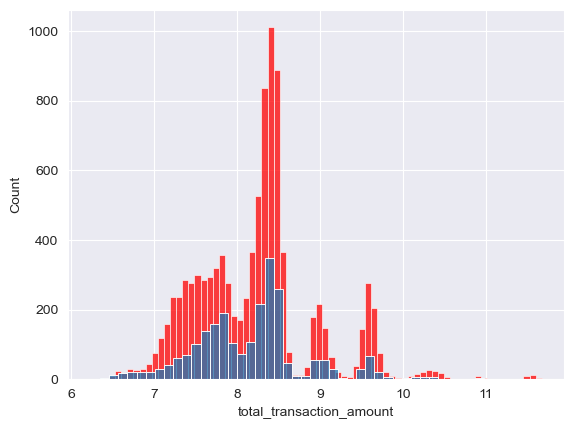

In [19]:
# here, where utilization is almost 0
# very similar distributions
sns.histplot(df['total_transaction_amount'], color='red')
sns.histplot(df[df['average_utilization'] == 0]['total_transaction_amount'])

Imputting:
- check relation between customer age and customer relationship length
- check relation between salary range and sex (and maybe cc limit)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_age', ylabel='customer_relationship_length'>

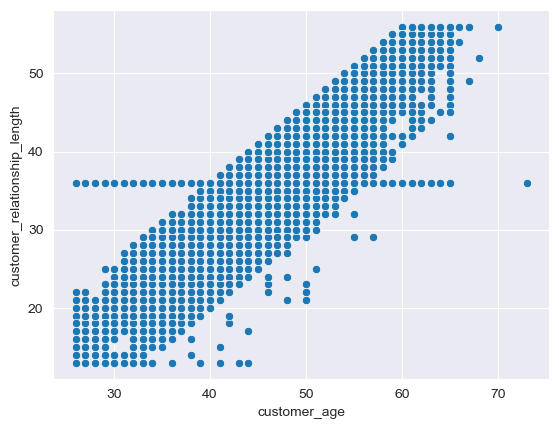

In [20]:
sns.scatterplot('customer_age', 'customer_relationship_length', data=df)

In [21]:
df['customer_age'].isna().sum()/len(df)

0.06161745827984596

In [22]:
# relationship between salary range, sex, cc limit

<AxesSubplot:xlabel='customer_salary_range', ylabel='Count'>

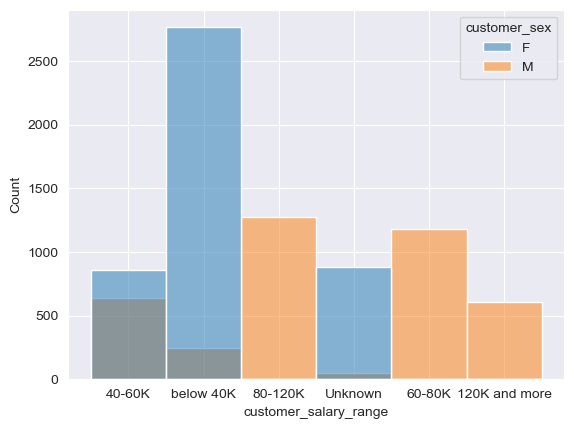

In [23]:
# males appearing much more often in higher salary ranges
sns.histplot(data=df, x='customer_salary_range', hue='customer_sex')

<AxesSubplot:xlabel='customer_salary_range', ylabel='customer_available_credit_limit'>

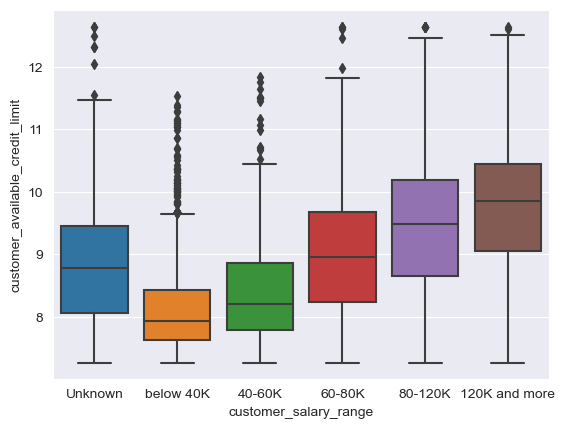

In [24]:
sns.boxplot(x='customer_salary_range', y='customer_available_credit_limit', data=df, order=['Unknown', 'below 40K', '40-60K', '60-80K', '80-120K', '120K and more'])

In [25]:
df['customer_sex'].value_counts()

F    4838
M    4271
Name: customer_sex, dtype: int64

In [26]:
df[df.customer_sex.isna() & df.customer_salary_range]
# when sex is missing, salary range is also missing

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,total_transaction_count_26_50,total_transaction_count_51_100,total_transaction_count_more_than_100,transaction_count_ratio_0_05,transaction_count_ratio_05_1,transaction_count_ratio_1_2,transaction_count_ratio_more_than_2,average_utilization_0_02,average_utilization_02_06,average_utilization_more_than_06
11,376752,54.0,NaN,2,High School,Married,80-120K,50,9.161045,Blue,...,0,1,0,0,1,0,0,0,1,0
14,160974,50.0,NaN,2,Unknown,Divorced,60-80K,41,7.994970,Blue,...,1,0,0,0,1,0,0,0,1,0
15,893405,65.0,NaN,0,College,Divorced,Unknown,56,9.522666,Blue,...,0,1,0,0,1,0,0,1,0,0
30,450792,58.0,NaN,2,High School,Married,Unknown,50,9.422383,Blue,...,0,1,0,0,1,0,0,1,0,0
33,367849,57.0,NaN,3,Graduate,Married,120K and more,38,9.017847,Blue,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,444852,60.0,NaN,1,High School,Married,below 40K,55,9.502935,Silver,...,0,0,1,0,1,0,0,1,0,0
10073,905133,59.0,NaN,0,Uneducated,Single,40-60K,46,7.407318,Blue,...,1,0,0,0,1,0,0,0,0,1
10104,622074,46.0,NaN,2,Uneducated,Single,60-80K,35,8.543056,Blue,...,0,1,0,0,1,0,0,0,1,0
10107,379656,47.0,NaN,4,Graduate,Married,Unknown,42,9.701922,Blue,...,0,0,1,0,1,0,0,1,0,0


Missing values treatment:
- Impute customer_age based on customer_relationship_length (OLS)
- Impute customer_sex, customer_salary_range and total_transaction_amount using kNN (inside CV)

In [27]:
df[df.customer_age.isna()]

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,total_transaction_count_26_50,total_transaction_count_51_100,total_transaction_count_more_than_100,transaction_count_ratio_0_05,transaction_count_ratio_05_1,transaction_count_ratio_1_2,transaction_count_ratio_more_than_2,average_utilization_0_02,average_utilization_02_06,average_utilization_more_than_06
10,201870,NaN,F,2,Graduate,Single,below 40K,27,7.725330,Blue,...,0,1,0,0,1,0,0,1,0,0
29,881372,NaN,F,4,Uneducated,Single,NaN,21,10.449178,Silver,...,0,1,0,0,1,0,0,1,0,0
37,418866,NaN,F,2,Graduate,Married,below 40K,33,7.708860,Blue,...,0,1,0,0,1,0,0,0,0,1
43,456242,NaN,NaN,0,Unknown,Married,40-60K,55,7.970740,Blue,...,1,0,0,0,1,0,0,0,0,1
56,579734,NaN,M,3,Graduate,Married,40-60K,36,7.698483,Blue,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,852574,NaN,F,4,Uneducated,Single,40-60K,34,9.236398,Blue,...,0,1,0,0,1,0,0,1,0,0
10077,623295,NaN,M,4,Uneducated,Single,60-80K,41,7.785305,Blue,...,1,0,0,0,0,1,0,0,0,1
10115,784178,NaN,M,3,High School,Married,80-120K,36,10.091045,Blue,...,0,1,0,0,1,0,0,1,0,0
10120,527751,NaN,M,4,Post-Graduate,Married,40-60K,36,7.704812,Blue,...,0,1,0,0,1,0,0,0,1,0


In [28]:
# Imputting missing vals of customer age
mask = df['customer_age'].isna()

X_complete = df.loc[~mask, 'customer_relationship_length']
y_complete = df.loc[~mask, 'customer_age']
X_incomplete = df.loc[mask, 'customer_relationship_length']

reg = LinearRegression()
reg.fit(X_complete.values.reshape(-1, 1), y_complete)

y_incomplete = reg.predict(X_incomplete.values.reshape(-1, 1))

df.loc[mask, 'customer_age'] = y_incomplete